# Data Science Aplicada à Área de Saúde

Projeto de análise de dados da formação FIAMED da [DSA](https://www.datascienceacademy.com.br/)

## Modelagem Preditiva em Registros Eletrônicos de Saúde

O objetivo deste projeto é prever se um paciente poderá ser readmitido em uma clínica no período de 30 dias após alta.

Esse projeto terá como base uma pesquisa realizada em 2018, chamada:

[Using Electronic Health Records and Machine Learning to Make Medical-Related Predictions from Non-Medical Data](https://ieeexplore.ieee.org/document/8614004)

## Carregando dados e compreendendo as variáveis

In [1]:
# Importar pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Carregando dados
dataset = pd.read_csv('dados/dataset.csv', index_col = [0]) # o dataset ja tem uma coluna de índice
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


__Dicionário de Dados__

Variáveis independendes:
- __IDADE__ - Idade do paciente (numérica)
- __SEXO_F__ - paciente do sexo feminino (categórica)
- __SEXO_M__ - paciente do sexo masculino (categórica)
- __ADM_CORRENTE_DIAS__ - Dias desde a admissão atual (numérica)
- __RECEB_MEDICAMENTOS__ - Recebeu medicamentos na última internação (categórica)
- __FEZ_EXAMES__ - Fez exames na última internação (categórica)
- __DEPEND_QUIMICO__ - Dependendo químico (categórica)
- __FUMANTE__ - Fumante (categórica)
- __ALCOOLISMO__ - Alcoolismo (categórica)
- __NUM_DIAS_INT_PREVIA__ - Número de internações anteriores (numérica)
- __ADM_PREVIA_DIAS__ - Dias da admissão anterior (numérica)
- __NUM_DIAS_LIC_MEDICA__ - Licença médica (numérica)

Variável dependente:
- __READMISSAO_30_DIAS__ - Readmissão dentro de 30 dias após a alta. 

obs. 0 - Não / 1 - Sim para todas as variáveis categóricas

## Análise exploratória

In [3]:
# dimensões do dataset
print(f'Número de linhas:\t{dataset.shape[0]}')
print(f'Número de colunas:\t{dataset.shape[1]}')

Número de linhas:	117180
Número de colunas:	13


In [4]:
# Tipo de dados
dataset.dtypes

IDADE                  float64
SEXO_F                   int64
SEXO_M                   int64
ADM_CORRENTE_DIAS        int64
RECEB_MEDICAMENTOS       int64
FEZ_EXAMES               int64
DEPEND_QUIMICO           int64
FUMANTE                  int64
ALCOOLISMO               int64
NUM_DIAS_INT_PREVIA      int64
ADM_PREVIA_DIAS          int64
NUM_DIAS_LIC_MEDICA      int64
READMISSAO_30_DIAS       int64
dtype: object

In [5]:
# Resumo estatístico
dataset.describe()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
count,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000
mean,65.066522,0.428239,0.571761,4.707680,0.160266,0.237020,0.597440,0.005274,0.008269,5.301988,12.328179,0.314456,0.189384
std,17.965229,0.494826,0.494826,6.257739,0.366854,0.425256,0.490416,0.072430,0.090559,14.324146,26.846820,3.366208,0.391815
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,12.000000,0.000000,0.000000
max,114.000000,1.000000,1.000000,307.000000,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,627.000000,315.000000,1.000000


In [6]:
print('Possíveis outliers\n' + '-'*42)
lista = ['IDADE', 'ADM_CORRENTE_DIAS', 'NUM_DIAS_INT_PREVIA', 'ADM_PREVIA_DIAS', 'NUM_DIAS_LIC_MEDICA']
print('Média\tMáximo\t3desv.pad.\tVariável')
for variavel in lista:
    print(f'{dataset[variavel].mean():>5.2f}\t',
          f'{dataset[variavel].max():^5.0f}\t',
          f'{round(dataset[variavel].mean() + dataset[variavel].std()*3, 2):^10}\t',
          f'{variavel}')

Possíveis outliers
------------------------------------------
Média	Máximo	3desv.pad.	Variável
65.07	  114 	   118.96  	 IDADE
 4.71	  307 	   23.48   	 ADM_CORRENTE_DIAS
 5.30	  170 	   48.27   	 NUM_DIAS_INT_PREVIA
12.33	  627 	   92.87   	 ADM_PREVIA_DIAS
 0.31	  315 	   10.41   	 NUM_DIAS_LIC_MEDICA


In [7]:
# Valores faltantes
dataset.isnull().mean()

IDADE                  0.0
SEXO_F                 0.0
SEXO_M                 0.0
ADM_CORRENTE_DIAS      0.0
RECEB_MEDICAMENTOS     0.0
FEZ_EXAMES             0.0
DEPEND_QUIMICO         0.0
FUMANTE                0.0
ALCOOLISMO             0.0
NUM_DIAS_INT_PREVIA    0.0
ADM_PREVIA_DIAS        0.0
NUM_DIAS_LIC_MEDICA    0.0
READMISSAO_30_DIAS     0.0
dtype: float64

In [8]:
# Linhas duplicadas
linha_duplicada = dataset[dataset.duplicated()]
print(f'Número de linhas duplicadas: {linha_duplicada.shape[0]}')

Número de linhas duplicadas: 60839


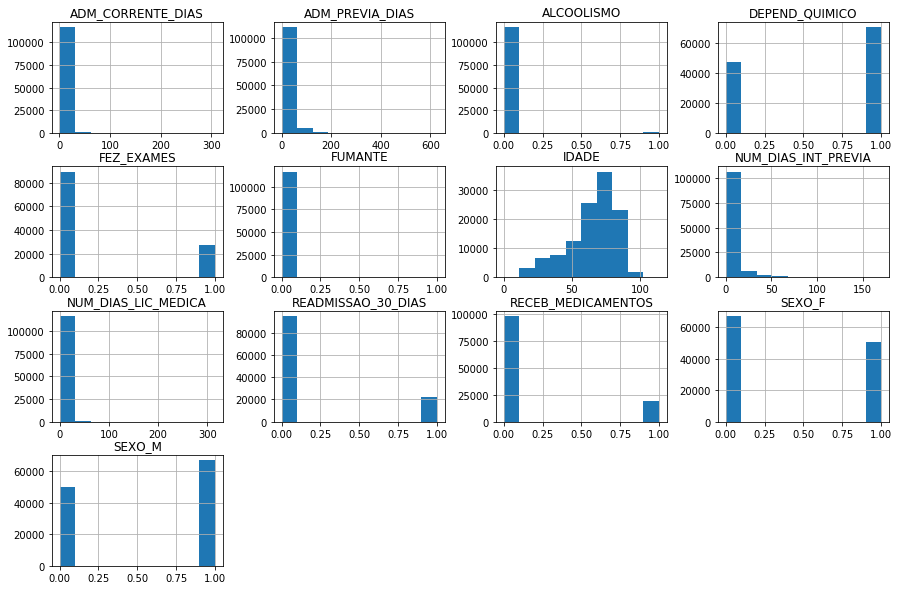

In [9]:
# Visualiza a distribuição dos dados
dataset.hist(figsize=(15,10));

### Variável IDADE

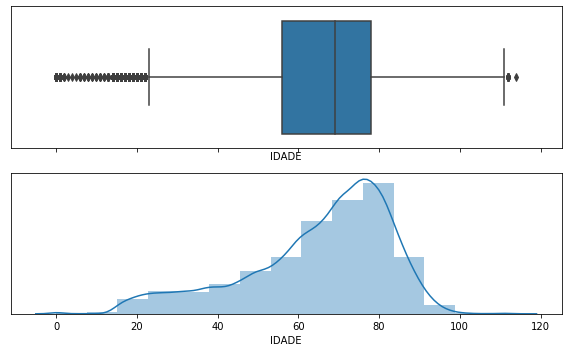

In [10]:
# Visualizar a variável IDADE
f, axes = plt.subplots(2, 1, figsize=(8,5), sharex=True)
sns.boxplot(dataset.IDADE, ax=axes[0])
sns.distplot(dataset.IDADE, bins=15, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [11]:
# Retirando outliers da variável IDADE
outliers_idade = dataset[(dataset['IDADE'] > 100) | (dataset['IDADE'] < 18)]
dataset = dataset.drop(outliers_idade.index)

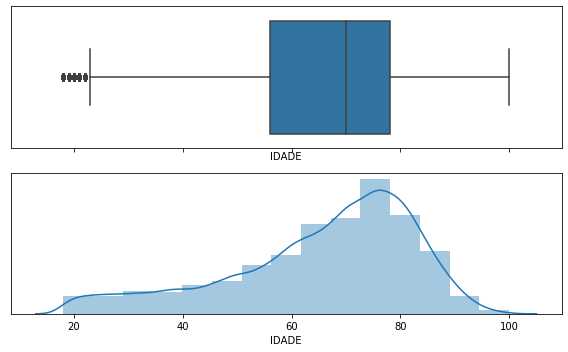

In [12]:
# Confirma a variável IDADE
f, axes = plt.subplots(2, 1, figsize=(8,5), sharex=True)
sns.boxplot(dataset.IDADE, ax=axes[0])
sns.distplot(dataset.IDADE, bins=15, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

### Variável ADM_CORRENTE_DIAS

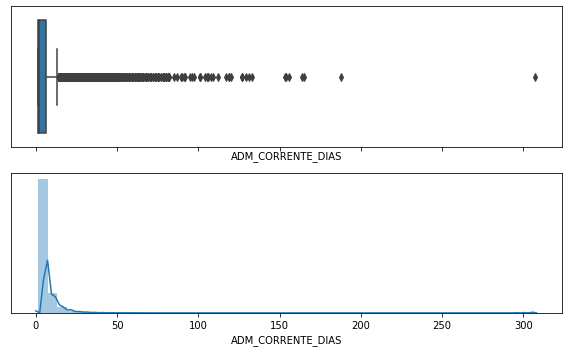

In [13]:
# Visualizar a variável ADM_CORRENTE_DIAS
f, axes = plt.subplots(2, 1, figsize=(8,5), sharex=True)
sns.boxplot(dataset.ADM_CORRENTE_DIAS, ax=axes[0])
sns.distplot(dataset.ADM_CORRENTE_DIAS, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [14]:
# Retira os outliers da variável ADM_CORRENTE_DIAS
outilier_admcorrentedias = dataset[dataset.ADM_CORRENTE_DIAS > 180]
dataset = dataset.drop(outilier_admcorrentedias.index)

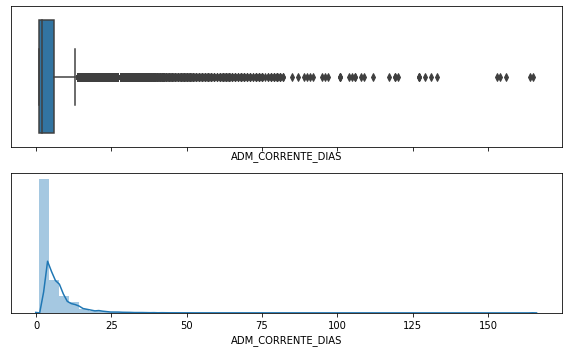

In [15]:
# Confirma a variável ADM_CORRENTE_DIAS
f, axes = plt.subplots(2, 1, figsize=(8,5), sharex=True)
sns.boxplot(dataset.ADM_CORRENTE_DIAS, ax=axes[0])
sns.distplot(dataset.ADM_CORRENTE_DIAS, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

### Variável ADM_PREVIA_DIAS

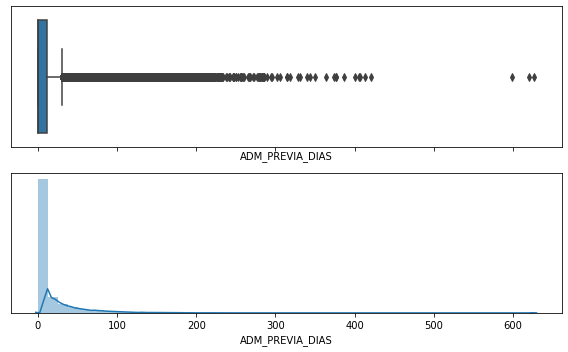

In [16]:
# Visualizar a variável ADM_PREVIA_DIAS
f, axes = plt.subplots(2, 1, figsize=(8,5), sharex=True)
sns.boxplot(dataset.ADM_PREVIA_DIAS, ax=axes[0])
sns.distplot(dataset.ADM_PREVIA_DIAS, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [17]:
# Retira os outliers da variável ADM_PREVIA_DIAS
outilier_admpreviadias = dataset[dataset.ADM_PREVIA_DIAS > 400]
dataset = dataset.drop(outilier_admpreviadias.index)

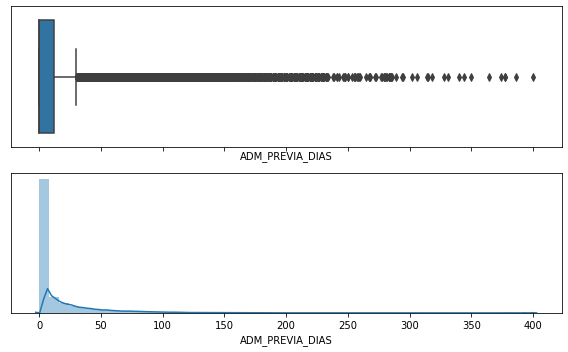

In [18]:
# Confirma a variável ADM_PREVIA_DIAS
f, axes = plt.subplots(2, 1, figsize=(8,5), sharex=True)
sns.boxplot(dataset.ADM_PREVIA_DIAS, ax=axes[0])
sns.distplot(dataset.ADM_PREVIA_DIAS, ax=axes[1])
plt.setp(axes, yticks=[])
plt.tight_layout()

### Variável NUM_DIAS_LIC_MEDICA

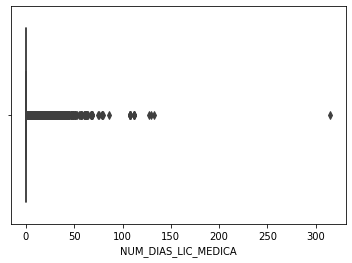

In [19]:
# Visualiza os outliers da variável NUM_DIAS_LIC_MEDICA
sns.boxplot(dataset.NUM_DIAS_LIC_MEDICA);

In [20]:
# Retira os outliers da variável NUM_DIAS_LIC_MEDICA
outilier_numdiaslicmedica = dataset[dataset.NUM_DIAS_LIC_MEDICA > 150]
dataset = dataset.drop(outilier_numdiaslicmedica.index)

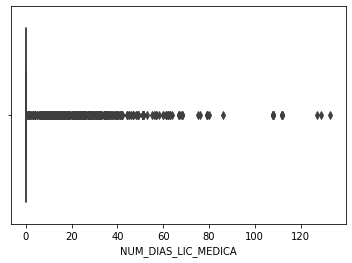

In [21]:
# Confirma os outliers da variável NUM_DIAS_LIC_MEDICA
sns.boxplot(dataset.NUM_DIAS_LIC_MEDICA);

## Correlações entre as variáveis

In [22]:
# Criando uma cópia do dataset
dataset_teste = dataset.copy()

In [23]:
# Convertendo as variáveis categóricas para o tipo categórico em Python
dataset_teste['SEXO_F'] = dataset_teste['SEXO_F'].astype('category')
dataset_teste['SEXO_M'] = dataset_teste['SEXO_M'].astype('category')
dataset_teste['RECEB_MEDICAMENTOS'] = dataset_teste['RECEB_MEDICAMENTOS'].astype('category')
dataset_teste['FEZ_EXAMES'] = dataset_teste['FEZ_EXAMES'].astype('category')
dataset_teste['DEPEND_QUIMICO'] = dataset_teste['DEPEND_QUIMICO'].astype('category')
dataset_teste['FUMANTE'] = dataset_teste['FUMANTE'].astype('category')
dataset_teste['ALCOOLISMO'] = dataset_teste['ALCOOLISMO'].astype('category')
dataset_teste['READMISSAO_30_DIAS'] = dataset_teste['READMISSAO_30_DIAS'].astype('category')

In [24]:
# Verificando os tipos de dados
dataset_teste.dtypes

IDADE                   float64
SEXO_F                 category
SEXO_M                 category
ADM_CORRENTE_DIAS         int64
RECEB_MEDICAMENTOS     category
FEZ_EXAMES             category
DEPEND_QUIMICO         category
FUMANTE                category
ALCOOLISMO             category
NUM_DIAS_INT_PREVIA       int64
ADM_PREVIA_DIAS           int64
NUM_DIAS_LIC_MEDICA       int64
READMISSAO_30_DIAS     category
dtype: object

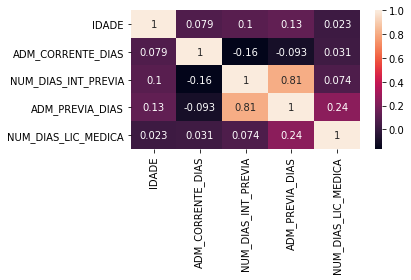

In [98]:
# Coeficiente de correlação 
dataset_teste_corr = dataset_teste.corr()
sns.heatmap(dataset_teste_corr, annot=True)
plt.tight_layout()

In [26]:
# Função para calcular a associação entre variáveis categóricas

## Pacote stats do Scipy
import scipy.stats as ss

## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Em Estatística, Cramér-V é uma medida de associação entre duas variáveis categóricas, fornecendo um valor 
# entre 0 e +1 (inclusive). É baseado na estatística do qui-quadrado (chi2) de Pearson e foi publicado 
# por Harald Cramér em 1946. 

# A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.

## Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [27]:
# Coleta as variáveis categóricas do dataset
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

categorical_vars = []

for column in dataset_teste:
    if is_string_dtype(dataset_teste[column]):
        categorical_vars.append(column)

In [28]:
categorical_vars

['SEXO_F',
 'SEXO_M',
 'RECEB_MEDICAMENTOS',
 'FEZ_EXAMES',
 'DEPEND_QUIMICO',
 'FUMANTE',
 'ALCOOLISMO',
 'READMISSAO_30_DIAS']

In [29]:
y = 'READMISSAO_30_DIAS'

print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print(f'Associação da Variável {var} com a variável resposta:', 
          f'{cramers_v(dataset_teste[var], dataset_teste[y]):.3f}')


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável SEXO_F com a variável resposta: 0.081
Associação da Variável SEXO_M com a variável resposta: 0.081
Associação da Variável RECEB_MEDICAMENTOS com a variável resposta: 0.142
Associação da Variável FEZ_EXAMES com a variável resposta: 0.350
Associação da Variável DEPEND_QUIMICO com a variável resposta: 0.211
Associação da Variável FUMANTE com a variável resposta: 0.088
Associação da Variável ALCOOLISMO com a variável resposta: 0.015
Associação da Variável READMISSAO_30_DIAS com a variável resposta: 1.000


## Pré-Processamento

In [30]:
# Verificando se a variável resposta está balanceada
target_count = dataset.READMISSAO_30_DIAS.value_counts()
target_count

0    93806
1    22110
Name: READMISSAO_30_DIAS, dtype: int64

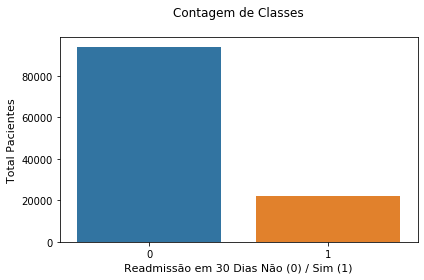

In [97]:
# Plot 
sns.countplot(dataset.READMISSAO_30_DIAS)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.tight_layout()

In [32]:
# Importa a função
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = dataset.iloc[:, 0:12]  
y = dataset.iloc[:, -1] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

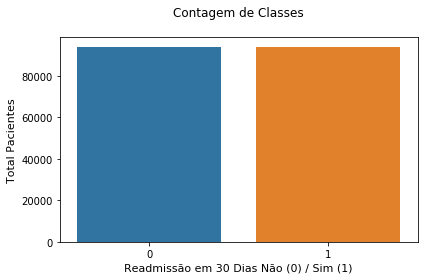

In [96]:
# Plot
sns.countplot(y_res)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.tight_layout()

In [34]:
# Split em X e y
X = X_res
y = y_res

In [35]:
X.shape

(187612, 12)

In [36]:
y.shape

(187612,)

In [37]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

test_size = .1
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=test_size)

In [38]:
X_treino.shape

(168850, 12)

In [39]:
y_treino.shape

(168850,)

In [40]:
X_teste.shape

(18762, 12)

In [41]:
y_teste.shape

(18762,)

## Construção dos Modelos Preditivos

In [42]:
# Imprtar pacotes
import keras
import tensorflow
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


## Versão 1 - Regressão Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [50]:
# Cria e treina o modelo
modelo_v1 = LogisticRegression(max_iter = 1000)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(max_iter=1000)

In [51]:
# Previsões (probabilidades)
previsoes_v1 = modelo_v1.predict_proba(X_teste)
previsoes_v1

array([[0.80031384, 0.19968616],
       [0.67268742, 0.32731258],
       [0.48962016, 0.51037984],
       ...,
       [0.22418428, 0.77581572],
       [0.00188596, 0.99811404],
       [0.87394183, 0.12605817]])

In [52]:
# Previsões (classes)
previsoes_v1 = modelo_v1.predict(X_teste)
previsoes_v1

array([0, 0, 1, ..., 1, 1, 0])

In [54]:
matriz_v1 = confusion_matrix(y_teste, previsoes_v1)
print(matriz_v1)

[[7760 1647]
 [2643 6712]]


In [55]:
# Relatório de classificação
classe_names = ['Não Readmitido (0)', 'Readmitido (1)']
report = classification_report(y_teste, previsoes_v1, target_names = classe_names)
print(report)

                    precision    recall  f1-score   support

Não Readmitido (0)       0.75      0.82      0.78      9407
    Readmitido (1)       0.80      0.72      0.76      9355

          accuracy                           0.77     18762
         macro avg       0.77      0.77      0.77     18762
      weighted avg       0.77      0.77      0.77     18762



* Score AUC

AUC é uma abreviação de Área Sob a Curva. É usado na análise de classificação para determinar quão bem o modelo prediz a classe de saída.

Um exemplo de sua aplicação são as curvas ROC. Aqui, as taxas de verdadeiros positivos são plotadas contra taxas de falsos positivos. Quanto mais próxima a AUC de um modelo chegar a 1, melhor será. Assim, os modelos com AUCs mais altas são preferíveis aos modelos com AUCs mais baixas.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

Obter o Score AUC de forma direta

In [56]:
# Score AUC
print(roc_auc_score(y_teste, previsoes_v1))

0.7711974497083804


Obter o Score AUC por meio de cálculos

In [57]:
# Extrai as taxas de verdadeiros e falsos positivos
taxa_falso_positivo, taxa_verdadeiro_positivo, thresholds = roc_curve(y_teste, previsoes_v1)

In [58]:
taxa_falso_positivo

array([0.        , 0.17508239, 1.        ])

In [59]:
taxa_verdadeiro_positivo

array([0.        , 0.71747728, 1.        ])

In [60]:
thresholds

array([2, 1, 0])

In [61]:
# Score AUC
print(auc(taxa_falso_positivo, taxa_verdadeiro_positivo))

0.7711974497083804


Diferença entre o Score calculado com `predict()` e `predict_proba()`

In [70]:
# Score AUCROC - Caso 1
y_pred_class = modelo_v1.predict(X_teste)
print(roc_auc_score(y_teste, y_pred_class))

0.7711974497083804


In [71]:
# Score AUCROC - Caso 2
# Por que o resultado é diferente?
y_pred_probs = modelo_v1.predict_proba(X_teste)[:,1] # Usamos [:,1] para buscar as probabilidades da classe positiva.
print(roc_auc_score(y_teste, y_pred_probs))

0.8362211646637023


A função predict() retorna apenas uma classe ou outra. Em seguida, você calcula um ROC com os resultados da previsão do modelo. Por outro lado, predict_proba() retorna uma gama inteira de probabilidades.

Ao usar o y_pred_class, você já decidiu o limite ou threshold (a função predict fez isso). Quando você usa y_pred_probs, você ainda não tem o limite, e a Curva ROC vai decidir o limite ao final. 

No Caso 1, você está usando a previsão (não as probabilidades), ou seja, a função já calculou o limite antes de calcular as classes previstas e isso é usado para calcular o AUC.

No Caso 2 estamos usando as probabilidades, ou seja, a função vai calcular o limite somente depois de criar a curva ROC, para então calcular o AUC.

Em resumo: 

- No Caso 1, a curva ROC é calculada para as duas classes com o limite (threshold) definido antes do cálculo do AUC.
- No Caso 2, a curva ROC é calculada para as duas classes com o limite (threshold) definido depois da criação da curva e então o AUC é calculado.


Por isso os valores são diferentes.

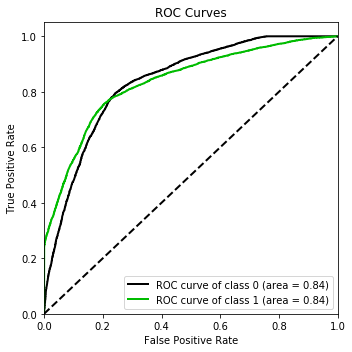

In [111]:
# Calcula a Curva ROC para cada classe
y_probs_v1 = modelo_v1.predict_proba(X_teste)
skplt.metrics.plot_roc(y_teste, y_probs_v1, figsize=(5,5), plot_micro=False, plot_macro=False)
plt.tight_layout()

Caso a classe do variável target estaja desbalanceada, o ideal é usar os scores Precision e/ou Recall

In [72]:
# Se as classes estiverem desbalanceadas, o ideal é usar a curva precision-recall 
from sklearn.metrics import precision_recall_curve

y_probs = modelo_v1.predict_proba(X_teste)[:,1]
precision, recall, thresholds = precision_recall_curve(y_teste, y_probs)

In [73]:
precision

array([0.49895994, 0.49893322, 0.49895983, ..., 1.        , 1.        ,
       1.        ])

In [74]:
recall

array([1.00000000e+00, 9.99893105e-01, 9.99893105e-01, ...,
       2.13789417e-04, 1.06894709e-04, 0.00000000e+00])

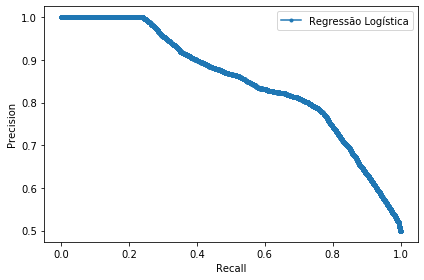

In [94]:
# Plot da curva precision-recall 
plt.plot(recall, precision, marker = '.', label = 'Regressão Logística')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()

* Coeficiente de Correlação de Matthews

O coeficiente de correlação de Matthews é usado em aprendizado de máquina como uma medida de qualidade em classificação binária, introduzido pelo bioquímico Brian W. Matthews em 1975. Ele leva em conta verdadeiros e falsos positivos e negativos e é geralmente considerado como um medida equilibrada, que pode ser usado mesmo se as classes são de tamanhos muito diferentes. 

O MCC é, em essência, um coeficiente de correlação entre as classificações binárias observadas e previstas; ele retorna um valor entre -1 e +1. Um coeficiente de 1 representa uma predição perfeita, 0 não melhor do que a previsão aleatória e -1 indica total discordância entre previsão e observação (inversão). 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

Embora não exista uma forma perfeita de descrever a matriz de confusão por um número único, o coeficiente de correlação Matthews é geralmente considerado como sendo um dos melhores para este fim. Outras medidas, como a proporção de previsões corretas (também denominado de precisão), não são úteis quando as duas classes são de tamanhos muito diferentes. Por exemplo, a atribuição de cada objeto para o conjunto maior alcança uma alta proporção de previsões corretas, mas geralmente não é uma classificação útil.

O MCC pode ser calculado diretamente a partir da matriz de confusão usando a fórmula:

$$MCC=\frac{TP * TN - FP * FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$$

In [78]:
# Coeficiente de Correlação de Matthews
print(matthews_corrcoef(y_teste, previsoes_v1))

0.5456405059077857


## Versão 2 - RandomForest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [79]:
# Cria e treina o modelo
modelo_v2 = RandomForestClassifier(n_estimators = 150)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=150)

In [86]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste)
matriz_v2 = confusion_matrix(y_teste, previsoes_v2)
print(matriz_v2)

[[8125 1282]
 [1731 7624]]


In [87]:
# Relatório de classificação
report = classification_report(y_teste, previsoes_v2)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      9407
           1       0.86      0.81      0.84      9355

    accuracy                           0.84     18762
   macro avg       0.84      0.84      0.84     18762
weighted avg       0.84      0.84      0.84     18762



In [88]:
# Score AUC
print(roc_auc_score(y_teste, previsoes_v2))

0.8393418833570438


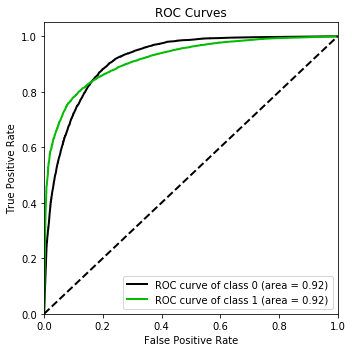

In [110]:
# Calcula a Curva ROC para cada classe
y_probs_v2 = modelo_v2.predict_proba(X_teste)
skplt.metrics.plot_roc(y_teste, y_probs_v2, figsize=(5,5), plot_micro=False, plot_macro=False)
plt.tight_layout()

In [91]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(y_teste, previsoes_v2))

0.679552847544476


## Versão 3 - KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Modelo não paramétrico

In [99]:
# Cria e treina o modelo
modelo_v4 = KNeighborsClassifier()
modelo_v4.fit(X_treino, y_treino)

KNeighborsClassifier()

In [100]:
# Previsões
previsoes_v4 = modelo_v4.predict(X_teste)
matriz_v4 = confusion_matrix(y_teste, previsoes_v4)
print(matriz_v4)

[[7338 2069]
 [1692 7663]]


In [102]:
# Relatório de classificação
report = classification_report(y_teste, previsoes_v4)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      9407
           1       0.79      0.82      0.80      9355

    accuracy                           0.80     18762
   macro avg       0.80      0.80      0.80     18762
weighted avg       0.80      0.80      0.80     18762



In [104]:
# Score AUC
print(roc_auc_score(y_teste, previsoes_v4))

0.7995957784601198


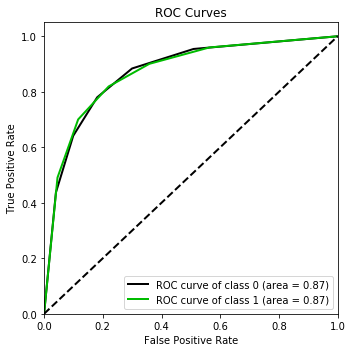

In [112]:
# Calcula a Curva ROC para cada classe
y_probs_v4 = modelo_v4.predict_proba(X_teste)
skplt.metrics.plot_roc(y_teste, y_probs_v4, figsize=(5,5), plot_micro=False, plot_macro=False)
plt.tight_layout()

In [106]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(y_teste, previsoes_v4))

0.5996091172697826


## Validação Cruzada

Informações sobre a função `cross_validate` 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

Métricas usadas na validação cruzada

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [114]:
# Função para imprimir o resultado da validação cruzada

# Ao realizar a validação cruzada, podemos usar todos os nossos dados, tanto para treinamento quanto para teste, 
# enquanto avaliamos nosso algoritmo de aprendizado em exemplos nunca antes vistos.

# Observe que estamos usando X e y

# Função para validação cruzada com duas métricas
def validacao_cruzada(modelo) :
    cv_results = cross_validate(modelo, X, y, scoring = ['accuracy', 'roc_auc'], cv = 5)

    print('\nAcurácia em Teste:', float(format(np.mean(cv_results['test_accuracy']), '.3f')))
    print('AUC em Teste:', float(format(np.mean(cv_results['test_roc_auc']), '.3f')))
    print()

In [116]:
%%time
modelos = [LogisticRegression(max_iter = 4000), 
           RandomForestClassifier(n_estimators = 150), 
           KNeighborsClassifier()]

for modelo in modelos:
    print("\nModelo e Parâmetros:", modelo)
    validacao_cruzada(modelo)


Modelo e Parâmetros: LogisticRegression(max_iter=4000)

Acurácia em Teste: 0.767
AUC em Teste: 0.833


Modelo e Parâmetros: RandomForestClassifier(n_estimators=150)

Acurácia em Teste: 0.821
AUC em Teste: 0.906


Modelo e Parâmetros: KNeighborsClassifier()

Acurácia em Teste: 0.787
AUC em Teste: 0.855

CPU times: user 3min 22s, sys: 4.14 s, total: 3min 26s
Wall time: 3min 17s


## Otimização de Hiperparâmetros

Principais Estratégias de Otimização de Hiperparâmetros:

- Pesquisa em grade [(Grid Search)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

    - Menos performático, prorém, menor custo computacional

- Pesquisa aleatória [(Random Search)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

    - Mais performático, prorém, Maior custo computacional

In [117]:
# Imports
import pandas as pd
import numpy as np

# Função para o Grid Search
from sklearn.model_selection import GridSearchCV

# Classe para a otimização de hiperparâmetros
class OtimizaHiperparametros:

    # Construtor da classe
    def __init__(self, models, params):
        
        # Verfica se algum modelo não tem hiperparâmetros para otimização
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Alguns estimadores estão com parâmetros ausentes: %s" % missing_params)
            
        # Inicia os atributos da classe
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    # Método para executar o Grid Search
    def fit(self, X, y, cv = 3, n_jobs = 3, verbose = 1, scoring = None, refit = False):
        
        # Loop por cada modelo (chave)
        for key in self.keys:
            print("\nExecutando GridSearchCV Para o Modelo %s:" % key)
            model = self.models[key]
            params = self.params[key]
            
            # Cria o objeto Grid Search para cada modelo
            gs = GridSearchCV(model, 
                              params, 
                              cv = cv, 
                              n_jobs = n_jobs, 
                              verbose = verbose, 
                              scoring = scoring, 
                              refit = refit, 
                              return_train_score = True)
            
            # Executa o Grid Search 
            gs.fit(X,y)
            
            # Salva o nome do modelo que foi processado
            self.grid_searches[key] = gs    

    # Método para calcular o score (métrica final)
    def score_summary(self, sort_by = 'mean_score'):
        
        # Função para criar uma linha com cada resultado do Grid Search
        def row(key, scores, params):
            d = {
                 'modelo': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        
        # Para cada resultado, retorna o resultadoo formatado
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            # Junta tudo em uma única estrutura
            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        # Gera cada coluna
        columns = ['modelo', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [118]:
# Lista dos modelos para otimização
lista_modelos = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

lista_modelos

{'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier()}

In [119]:
# Grid de parâmetros que serão testados
grid_parametros = {
    'LogisticRegression': { 'max_iter': [4000, 5000, 8000, 10000] },
    'RandomForestClassifier': { 'n_estimators': [175, 200, 225, 250] },
    'KNeighborsClassifier': { 'n_neighbors': [4, 5, 6, 7], 'metric': ['minkowski'], 'p': [1, 2, 3] }
}

grid_parametros

{'LogisticRegression': {'max_iter': [4000, 5000, 8000, 10000]},
 'RandomForestClassifier': {'n_estimators': [175, 200, 225, 250]},
 'KNeighborsClassifier': {'n_neighbors': [4, 5, 6, 7],
  'metric': ['minkowski'],
  'p': [1, 2, 3]}}

In [120]:
# Cria o otimizador de parâmetros (instância da classe)
otimizador_parametros = OtimizaHiperparametros(lista_modelos, grid_parametros)

In [123]:
%%time

# Executa o otimizador
otimizador_parametros.fit(X_treino, y_treino, scoring = 'roc_auc', n_jobs = -1)


Executando GridSearchCV Para o Modelo LogisticRegression:
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Executando GridSearchCV Para o Modelo RandomForestClassifier:
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



Executando GridSearchCV Para o Modelo KNeighborsClassifier:
Fitting 3 folds for each of 12 candidates, totalling 36 fits
CPU times: user 519 ms, sys: 298 ms, total: 817 ms
Wall time: 9min 15s


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.7min finished


In [124]:
# Sumário da otimização
otimizador_parametros.score_summary(sort_by = 'max_score')

LogisticRegression
RandomForestClassifier
KNeighborsClassifier


,modelo,min_score,mean_score,max_score,std_score,max_iter,n_estimators,metric,n_neighbors,p
6,RandomForestClassifier,0.905177,0.906368,0.907695,0.00103241,NaN,225,NaN,NaN,NaN
7,RandomForestClassifier,0.90525,0.906426,0.907657,0.000983157,NaN,250,NaN,NaN,NaN
4,RandomForestClassifier,0.905208,0.906388,0.907625,0.000987649,NaN,175,NaN,NaN,NaN
5,RandomForestClassifier,0.904877,0.906259,0.907618,0.00111915,NaN,200,NaN,NaN,NaN
17,KNeighborsClassifier,0.861235,0.862597,0.863598,0.000997874,NaN,NaN,minkowski,7,1
14,KNeighborsClassifier,0.860577,0.86237,0.863489,0.00128108,NaN,NaN,minkowski,6,1
11,KNeighborsClassifier,0.860202,0.861615,0.862417,0.00100178,NaN,NaN,minkowski,5,1
8,KNeighborsClassifier,0.857954,0.859501,0.860535,0.00111451,NaN,NaN,minkowski,4,1
15,KNeighborsClassifier,0.856838,0.858508,0.859671,0.00121073,NaN,NaN,minkowski,6,2
12,KNeighborsClassifier,0.857246,0.858218,0.858809,0.000692676,NaN,NaN,minkowski,5,2


## Comparando os Modelos

In [126]:
# Comparando o Score AUC dos modelos

# Cria lista vazia
lista_auc = []

# Calcula o Score AUC para cada modelo
auc_modelo_v1 = roc_auc_score(y_teste, previsoes_v1)
auc_modelo_v2 = roc_auc_score(y_teste, previsoes_v2)
auc_modelo_v4 = roc_auc_score(y_teste, previsoes_v4)

# Junta os resultados em uma lista
lista_auc = [auc_modelo_v1, auc_modelo_v2, auc_modelo_v4]

In [127]:
# Comparando o Coeficiente de Correlação de Matthews dos modelos

# Cria lista vazia
lista_mcorr = []

# Calcula o Coeficiente para cada modelo
mcorr_v1 = matthews_corrcoef(y_teste, previsoes_v1)
mcorr_v2 = matthews_corrcoef(y_teste, previsoes_v2)
mcorr_v4 = matthews_corrcoef(y_teste, previsoes_v4)

# Junta os resultados em uma lista
lista_mcorr = [mcorr_v1, mcorr_v2, mcorr_v4]

In [128]:
# Comparando a Acurácia dos modelos

# Cria lista vazia
lista_acc = []

# Calcula a Acurácia para cada modelo
acc_modelo_v1 = accuracy_score(y_teste, previsoes_v1)
acc_modelo_v2 = accuracy_score(y_teste, previsoes_v2)
acc_modelo_v4 = accuracy_score(y_teste, previsoes_v4)

# Junta os resultados em uma lista
lista_acc = [acc_modelo_v1, acc_modelo_v2, acc_modelo_v4]

In [129]:
# Concatena as 3 listas de métricas em uma única tabela
lista_metricas = pd.DataFrame(np.column_stack([lista_auc, lista_mcorr, lista_acc]), 
                              columns = ['AUC', 'Matthews', 'Acurácia'])

# Adiciona uma coluna com os nomes dos modelos
lista_metricas['Modelo'] = ['Regressão Logística', 'RandomForest', 'KNN']

In [130]:
# Lista as métricas por ordem decrescente do Score AUC
lista_metricas.sort_values(by ='AUC', ascending = False)

,AUC,Matthews,Acurácia,Modelo
1,0.839342,0.679553,0.839409,RandomForest
2,0.799596,0.599609,0.799542,KNN
0,0.771197,0.545641,0.771346,Regressão Logística


## Preparando a Versão Final do Modelo

In [131]:
# Cria e treina o modelo
modelo_final_rf = RandomForestClassifier(n_estimators = 200)
modelo_final_rf.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=200)

In [132]:
# Salvando o modelo
import pickle
filename = 'modelos/modelo_final.sav'
pickle.dump(modelo_final_rf, open(filename, 'wb'))

In [133]:
# Carregando o Modelo
classificador_pacientes = pickle.load(open(filename, 'rb'))

In [134]:
classificador_pacientes

RandomForestClassifier(n_estimators=200)

## Deploy do Modelo

In [135]:
# Os novos dados devem estar no mesmo formato usado nos dados de teste
X_teste.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
185661,35.005033,1,0,3,0,0,1,0,0,0,0,0
61358,65.000000,0,1,1,0,0,1,0,0,0,0,0
96109,84.000000,0,1,1,0,0,1,0,0,27,43,0
180479,74.779830,0,1,1,0,0,0,0,0,74,89,0
148933,59.128061,0,0,1,0,1,0,0,0,16,38,0


In [136]:
X_teste.shape

(18762, 12)

In [137]:
# Dados de um novo paciente
novo_paciente = np.array([54,1,0,1,0,1,0,0,0,0,0,0])
print(novo_paciente.shape)
print(novo_paciente)

(12,)
[54  1  0  1  0  1  0  0  0  0  0  0]


In [138]:
# Ajustando o shape dos dados para o modelo
novo_paciente_reshaped = novo_paciente.reshape(1, -1)
print(novo_paciente_reshaped.shape)
print(novo_paciente_reshaped)

(1, 12)
[[54  1  0  1  0  1  0  0  0  0  0  0]]


In [139]:
# Fazendo a previsão
print("\nO paciente será readmitido na clínica em até 30 dias após a alta?")
previsao = classificador_pacientes.predict(novo_paciente_reshaped)
if previsao == 0:
      print("\nNão, o paciente não deve ser readmitido na clínica em até 30 dias após a alta.")
else:
      print("\nSim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.")


O paciente será readmitido na clínica em até 30 dias após a alta?

Sim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.


---